In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_pickle("Cleaned Data2.pkl")
df.head()

,TIME OCC,AREA,Part 1-2,LAT,LON,Lag,Month of Occurance,Date of Occurance,GROUP,PREMSE,Age,Gender,Race,WEAPON,Target
0,13,4,1,34.0201,-118.1935,4,6,20,GRAND THEFT,STREET,31.0,X,X,NOT USED,0
1,23,14,1,33.9860,-118.4478,139,9,13,GRAND THEFT,STREET,31.0,X,X,NOT USED,0
2,20,9,2,34.1794,-118.4574,0,6,23,OTHERS,STREET,31.0,M,O,NOT USED,0
3,22,19,1,34.2160,-118.4678,1,8,9,GRAND THEFT,STREET,31.0,X,X,NOT USED,0
4,8,20,1,34.0591,-118.3205,1,12,8,GRAND THEFT,STREET,31.0,X,X,NOT USED,0


In [4]:
df.drop(["LAT","LON"],axis=1,inplace = True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TIME OCC,945108.0,13.202270,6.534191,0.0,9.0,14.0,19.0,23.0
AREA,945108.0,10.728422,6.092555,1.0,6.0,11.0,16.0,21.0
Part 1-2,945108.0,1.416614,0.492998,1.0,1.0,1.0,2.0,2.0
Lag,945108.0,10.809770,60.836676,0.0,0.0,1.0,2.0,1584.0
Month of Occurance,945108.0,6.531301,3.307512,1.0,4.0,7.0,9.0,12.0
Date of Occurance,945108.0,15.331808,8.959699,1.0,7.0,15.0,23.0,31.0
Age,945108.0,37.516399,14.139363,2.0,30.0,31.0,45.0,99.0
Target,945108.0,0.204948,0.403664,0.0,0.0,0.0,0.0,1.0


In [ ]:
my_dict = {
    'Time of Occurance': ['Morning','Afternoon','Evening' , 'Night'],
    'AREA': ['Central','Rampart','Southwest','Hollenbeck','Harbor','Hollywood','Wilshire','West LA','Van Nuys','West Valley',
             'Northeast','77th Street','Newton','Pacific','N Hollywood','Foothill','Devonshire','Southeast','Mission','Olympic',
             'Topanga'],
    'Crime Type': ['GRAND THEFT','ASSULT','THEFT','VANDALISM','IDENTITY THEFT','SERIOUS ASSULT','THREATS','WEAPON ASSULT',
                   'TRESPASSING','VIOLATION','OTHERS','SEX OFFENDERS','CRIMES AGAINST CHILDREN','HOMICIDE','KIDNAPPING',
                   'FINANCIAL CRIME'],
    'Premise' : ['STREET','DOMESTIC','PARKING/GARAGE','BUSINESS AREA','VEHICLE','OTHER','PUBLIC PLACE','ENTERTAINMENT ZONE',
                'BANK','EDUCATIONAL AREA','MEDICAL CENTERS','DOMESTIC TEMPORARY','ROADS'],
    'Weapons Used': ['BODILY FORCE','UNKNOWN WEAPON','NOT USED','FIREARM','SHARP OBJECTS','OTHER','BLUNT OBJECT'],
    'Date of Incidence' : 
    'Date Reported' :
    'Vicitim Age' :
    'Victim Sex' : ['M','F','X']
    'Vicitim Race' : ['Hispanic','Asian','White','Black','Other US','Other Race','Do not Wish to disclose/Not Reported']  

}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945108 entries, 0 to 945107
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TIME OCC            945108 non-null  int32  
 1   AREA                945108 non-null  int64  
 2   Part 1-2            945108 non-null  int64  
 3   Lag                 945108 non-null  int64  
 4   Month of Occurance  945108 non-null  int32  
 5   Date of Occurance   945108 non-null  int32  
 6   GROUP               945108 non-null  object 
 7   PREMSE              945108 non-null  object 
 8   Age                 945108 non-null  float64
 9   Gender              945108 non-null  object 
 10  Race                945108 non-null  object 
 11  WEAPON              945108 non-null  object 
 12  Target              945108 non-null  int32  
dtypes: float64(1), int32(4), int64(3), object(5)
memory usage: 79.3+ MB


In [7]:
df['TIME CAT'] = np.where(df['TIME OCC'].isin(range(0,6)),"Night",
                         np.where(df['TIME OCC'].isin(range(6,12)),"Morning",
                                 np.where(df['TIME OCC'].isin(range(12,6)),"Afternoon",
                                         np.where(df['TIME OCC'].isin(range(0,7)),"Evening","Missing"))))
df.head()

,TIME OCC,AREA,Part 1-2,Lag,Month of Occurance,Date of Occurance,GROUP,PREMSE,Age,Gender,Race,WEAPON,Target,TIME CAT
0,13,4,1,4,6,20,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
1,23,14,1,139,9,13,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
2,20,9,2,0,6,23,OTHERS,STREET,31.0,M,O,NOT USED,0,Missing
3,22,19,1,1,8,9,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
4,8,20,1,1,12,8,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Morning


In [8]:
df['TIME CAT'].value_counts(dropna = False)

TIME CAT
Missing    602453
Morning    196369
Night      146286
Name: count, dtype: int64

In [9]:
df.drop(['TIME OCC'],axis=1,inplace= True)
df.head()

,AREA,Part 1-2,Lag,Month of Occurance,Date of Occurance,GROUP,PREMSE,Age,Gender,Race,WEAPON,Target,TIME CAT
0,4,1,4,6,20,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
1,14,1,139,9,13,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
2,9,2,0,6,23,OTHERS,STREET,31.0,M,O,NOT USED,0,Missing
3,19,1,1,8,9,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing
4,20,1,1,12,8,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Morning


In [10]:
df['Lag_in_Report'] = np.where(df['Lag'].isin([0,1]),0,
                              np.where(df['Lag'].isin(range(2,8)),1,
                                       np.where(df['Lag'].isin(range(8,32)),2,
                                               np.where(df['Lag'].isin(range(32,366)),3,4))))

In [115]:
df.head(20)

,AREA,Part 1-2,Month of Occurance,Date of Occurance,GROUP,PREMSE,Age,Gender,Race,WEAPON,Target,TIME CAT,Lag_in_Report
0,4,1,6,20,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,1
1,14,1,9,13,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,3
2,9,2,6,23,OTHERS,STREET,31.0,M,O,NOT USED,0,Missing,0
3,19,1,8,9,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,0
4,20,1,12,8,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Morning,0
5,18,1,9,15,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,0
6,5,1,5,22,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,0
7,14,1,6,30,GRAND THEFT,STREET,31.0,X,X,NOT USED,0,Missing,0
8,19,1,11,23,THEFT,ENTERTAINMENT ZONE,35.0,M,W,NOT USED,0,Missing,0
9,2,1,11,26,GRAND THEFT,STREET,31.0,X,X,NOT USED,1,Missing,0


In [12]:
df['Lag_in_Report'].value_counts(dropna = False)

Lag_in_Report
0    675797
1    150346
2     68157
3     44818
4      5990
Name: count, dtype: int64

In [13]:
df.drop(['Lag'],axis=1,inplace = True)

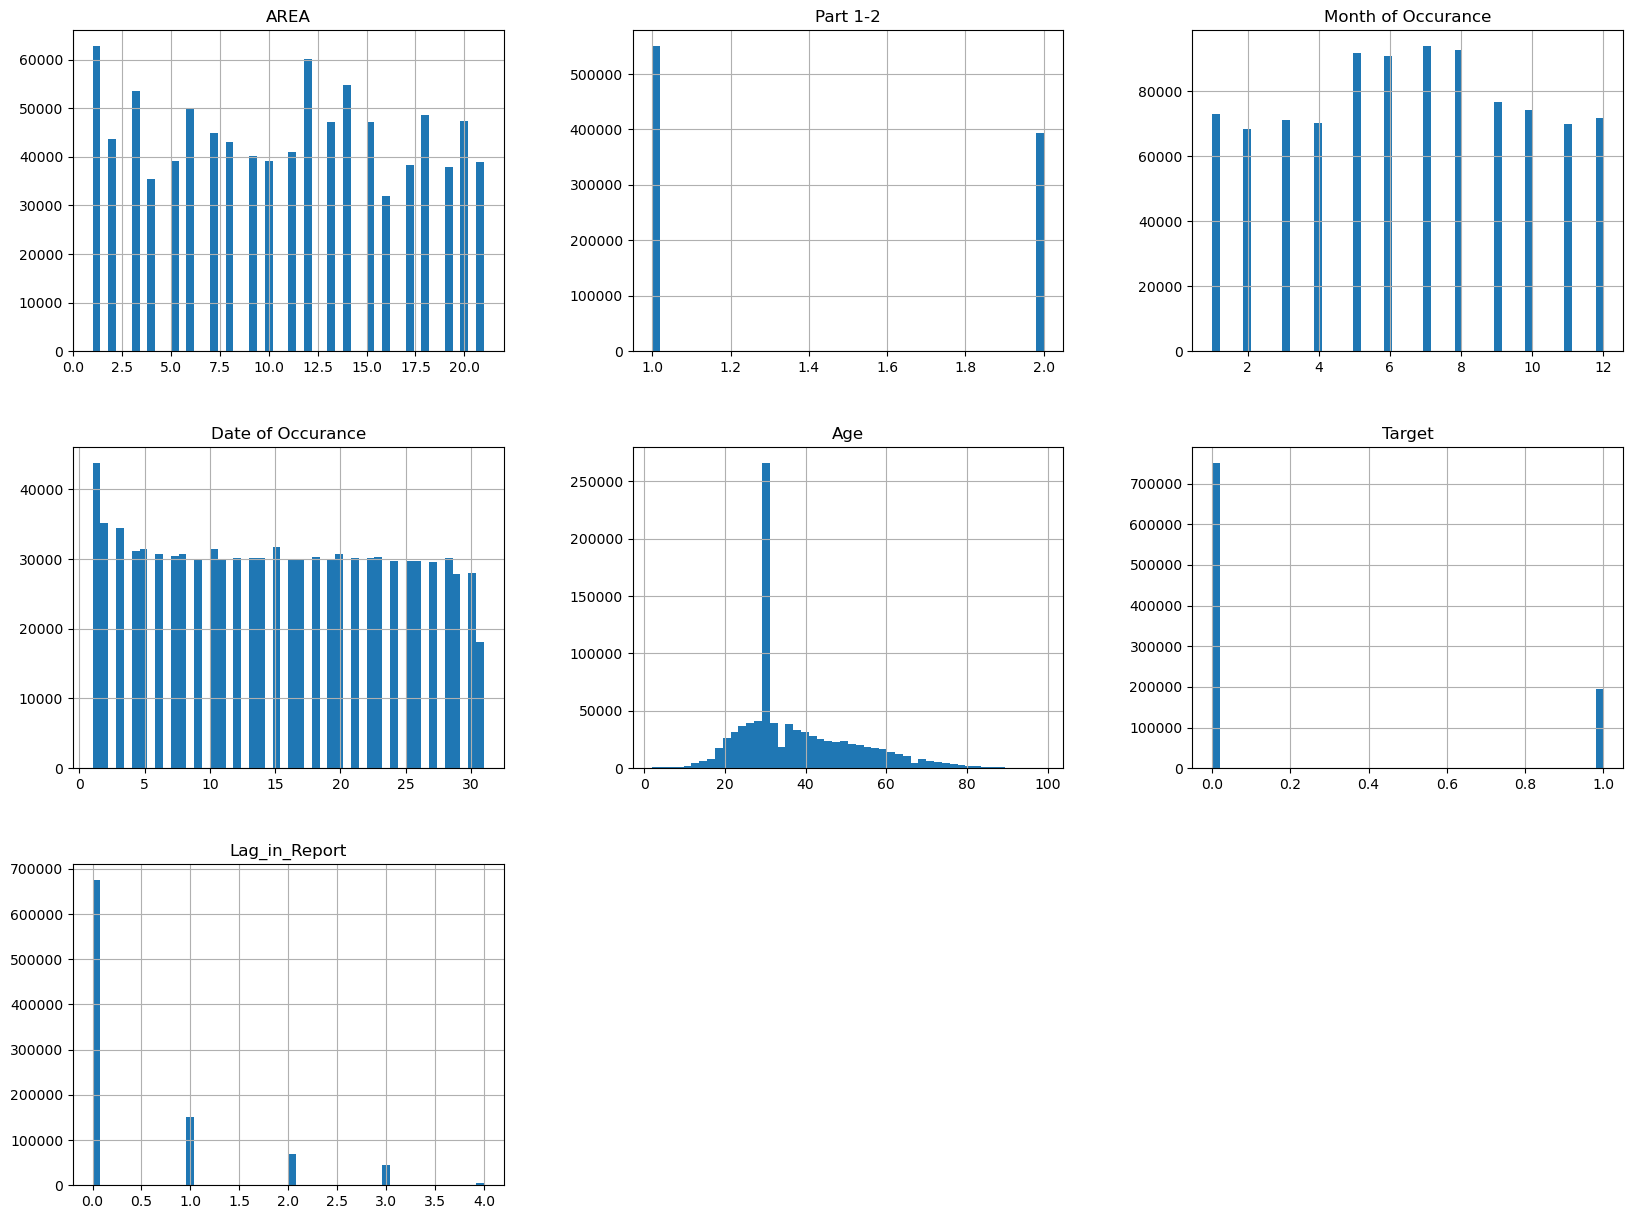

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Target",axis=1), df[['Target']], test_size=0.30, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(661575, 12)
(283533, 12)
(661575, 1)
(283533, 1)


Target
0    526025
1    135550
Name: count, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

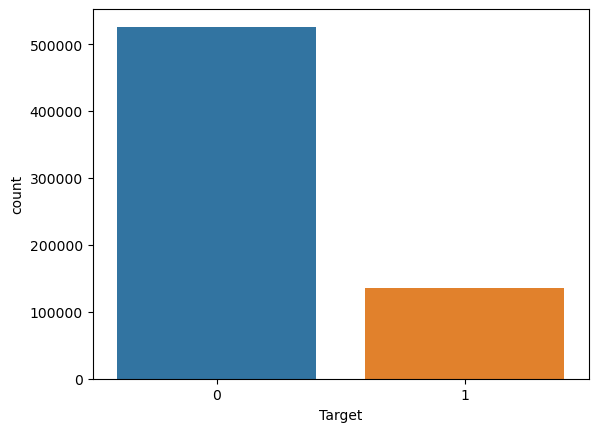

In [17]:
print(y_train['Target'].value_counts())
sns.countplot(y_train,x=y_train['Target'])

In [18]:
df_train = x_train.join(y_train)
df_train.shape

(661575, 13)

In [19]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['Target']==0)] 
df_minority = df_train[(df_train['Target']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 500000, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Target
0    526025
1    500000
Name: count, dtype: int64


<Axes: xlabel='Target', ylabel='count'>

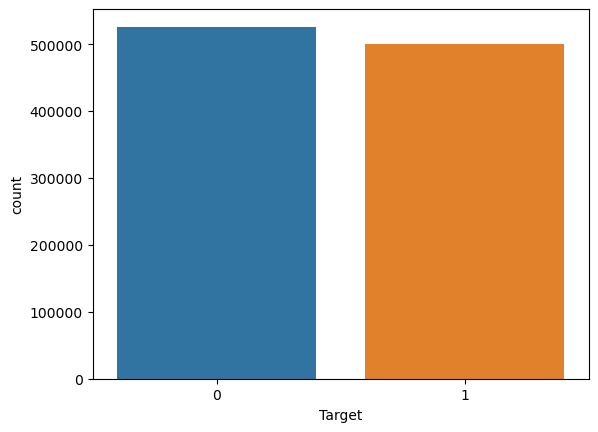

In [20]:
print(df_upsampled['Target'].value_counts())
sns.countplot(df_upsampled,x=df_upsampled['Target'])

In [21]:
df_upsampled.shape

(1026025, 13)

In [22]:
X_train = df_upsampled.drop(['Target'],axis=1)
y_train = df_upsampled['Target']

In [23]:
X_train.shape

(1026025, 12)

In [24]:
X_cat = X_train.drop(['Age','Lag_in_Report','Date of Occurance'],axis=1)
X_cat.columns

Index(['AREA', 'Part 1-2', 'Month of Occurance', 'GROUP', 'PREMSE', 'Gender',
       'Race', 'WEAPON', 'TIME CAT'],
      dtype='object')

In [25]:
X_num = X_train[['Age','Lag_in_Report','Date of Occurance']].reset_index()
X_num.head()

,index,Age,Lag_in_Report,Date of Occurance
0,294117,31.0,0,13
1,526683,37.0,0,25
2,99442,46.0,0,20
3,793884,49.0,0,13
4,675063,31.0,0,5


In [26]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_cat)
# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat) for cat in encoder.categories_[i]]
# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
X_train_enc = X_num.join(one_hot_features)
X_train_enc.head()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,Age,Lag_in_Report,Date of Occurance,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,...,WEAPON_BLUNT OBJECT,WEAPON_BODILY FORCE,WEAPON_FIREARM,WEAPON_NOT USED,WEAPON_OTHER,WEAPON_SHARP OBJECTS,WEAPON_UNKNOWN WEAPON,TIME CAT_Missing,TIME CAT_Morning,TIME CAT_Night
0,294117,31.0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,526683,37.0,0,25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,99442,46.0,0,20,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,793884,49.0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,675063,31.0,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [27]:
X_train_enc.drop("index",axis=1,inplace = True)

In [112]:
str(X_train['AREA'].iloc[0])

'17'

In [119]:
tmp = X_train['GROUP'].iloc[16]
tmp.replace("ASSAULT","ASSULT")
tmp

'SERIOUS ASSULT'

In [113]:
X_train_enc.columns

Index(['Age', 'Lag_in_Report', 'Date of Occurance', 'AREA_1', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Part 1-2_1', 'Part 1-2_2', 'Month of Occurance_1',
       'Month of Occurance_2', 'Month of Occurance_3', 'Month of Occurance_4',
       'Month of Occurance_5', 'Month of Occurance_6', 'Month of Occurance_7',
       'Month of Occurance_8', 'Month of Occurance_9', 'Month of Occurance_10',
       'Month of Occurance_11', 'Month of Occurance_12', 'GROUP_ASSULT',
       'GROUP_CRIMES AGAINST CHILDREN', 'GROUP_FINANCIAL CRIME',
       'GROUP_GRAND THEFT', 'GROUP_HOMICIDE', 'GROUP_IDENTITY THEFT',
       'GROUP_KIDNAPPING', 'GROUP_OTHERS', 'GROUP_SERIOUS ASSULT',
       'GROUP_SEX OFFENDERS', 'GROUP_THEFT', 'GROUP_THREATS',
       'GROUP_TRESPASSING', 'GROUP_VANDALISM', 'GROUP_VIOLATION',
     

In [87]:
test = pd.DataFrame(columns=X_train_enc.columns)

In [98]:
test.to_pickle("Base_Data.pkl")

In [90]:
test['Age']=10

In [91]:
test

,Age,Lag_in_Report,Date of Occurance,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,AREA_7,...,WEAPON_BLUNT OBJECT,WEAPON_BODILY FORCE,WEAPON_FIREARM,WEAPON_NOT USED,WEAPON_OTHER,WEAPON_SHARP OBJECTS,WEAPON_UNKNOWN WEAPON,TIME CAT_Missing,TIME CAT_Morning,TIME CAT_Night


In [28]:
X_train_enc.shape

(1026025, 88)

In [97]:
data = {'Age':[10]}
test2 = pd.DataFrame(data)
test3 = pd.concat([test,test2])
test3

,Age,Lag_in_Report,Date of Occurance,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,AREA_7,...,WEAPON_BLUNT OBJECT,WEAPON_BODILY FORCE,WEAPON_FIREARM,WEAPON_NOT USED,WEAPON_OTHER,WEAPON_SHARP OBJECTS,WEAPON_UNKNOWN WEAPON,TIME CAT_Missing,TIME CAT_Morning,TIME CAT_Night
0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#y = df[['Target']]
y_train.shape

(1026025,)

In [30]:
X_cat = x_test.drop(['Age','Lag_in_Report','Date of Occurance'],axis=1)
X_num = x_test[['Age','Lag_in_Report','Date of Occurance']].reset_index()
X_encoded = encoder.fit_transform(X_cat)
# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat) for cat in encoder.categories_[i]]
# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
X_test_enc = X_num.join(one_hot_features)
X_test_enc.head()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,Age,Lag_in_Report,Date of Occurance,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,...,WEAPON_BLUNT OBJECT,WEAPON_BODILY FORCE,WEAPON_FIREARM,WEAPON_NOT USED,WEAPON_OTHER,WEAPON_SHARP OBJECTS,WEAPON_UNKNOWN WEAPON,TIME CAT_Missing,TIME CAT_Morning,TIME CAT_Night
0,651269,35.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,934043,22.0,1,31,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,220083,44.0,0,23,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,635001,29.0,0,29,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,764036,35.0,2,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_test_enc.drop("index",axis=1,inplace = True)
X_test_enc.shape

(283533, 88)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

#### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier(max_depth=50, min random_state=42)
dec_tree_clf.fit(X_train_enc, y_train)

In [34]:
y_train_predict = dec_tree_clf.predict(X_train_enc)

In [35]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_precision)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  0.9970509768355817
Decision Tree Precision:  0.997048636914209
Decision Tree Recall:  0.997048636914209
Decision Tree F1 Score:  0.9970487457013125


In [36]:
X_train_enc.to_pickle("X_train_enc.pkl")
x_test.to_pickle("x_test.pkl")
X_train_enc.to_pickle("y_train.pkl")
y_test.to_pickle("y_test.pkl")

## RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

In [38]:
rf_classifier=RandomForestClassifier(n_estimators=150, max_depth = 30, min_samples_split = 10, random_state=42)

In [39]:
rf_classifier.fit(X_train_enc, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=150,
                       random_state=42)

In [40]:
y_pred_train = rf_classifier.predict(X_train_enc)
rnd_accuracy = accuracy_score(y_train, y_pred_train)
rnd_precision = precision_score(y_train, y_pred_train, average='weighted')
rnd_recall = recall_score(y_train, y_pred_train, average='weighted')
rnd_f1_score = f1_score(y_train, y_pred_train , average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.8851148851148851
Random Forest Precision:  0.8854589342583855
Random Forest Recall:  0.8854589342583855
Random Forest F1 Score:  0.8851333389146765


In [41]:
y_pred= rf_classifier.predict(X_test_enc)
rnd_accuracy = accuracy_score(y_test, y_pred)
rnd_precision = precision_score(y_test, y_pred, average='weighted')
rnd_recall = recall_score(y_test, y_pred, average='weighted')
rnd_f1_score = f1_score(y_test, y_pred , average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.7898868914729502
Random Forest Precision:  0.8244145023519529
Random Forest Recall:  0.8244145023519529
Random Forest F1 Score:  0.8017169289969835


In [43]:
y_probabilities = rf_classifier.predict_proba(X_test_enc)

# For binary classification, y_probabilities[:, 1] contains the probabilities for the positive class
predicted_probabilities = y_probabilities[:, 1]


In [45]:
predicted_probabilities

array([0.25510214, 0.091788  , 0.88640818, ..., 0.04930579, 0.15379415,
       0.03044673])

In [46]:
from sklearn.metrics import confusion_matrix

In [49]:
print(confusion_matrix(y_test, y_pred,labels=rf_classifier.classes_))

[[183919  41466]
 [ 18108  40040]]


In [44]:
import pickle

In [50]:
# Save the best Random Forest model to a file using pickle
with open('best_rf_model.pkl_f1', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [63]:
best_rf_model

RandomForestClassifier(min_samples_leaf=2, n_estimators=150, random_state=42)

In [71]:
print("Feature Importances:")
for feature, importance in zip(X_train_enc.columns, rf_classifier.feature_importances_):
    print(f'{feature}: {importance:.4f}')

Feature Importances:
Age: 0.0680
Lag_in_Report: 0.0360
Date of Occurance: 0.0785
AREA_1: 0.0056
AREA_2: 0.0039
AREA_3: 0.0055
AREA_4: 0.0034
AREA_5: 0.0041
AREA_6: 0.0055
AREA_7: 0.0040
AREA_8: 0.0038
AREA_9: 0.0045
AREA_10: 0.0049
AREA_11: 0.0035
AREA_12: 0.0043
AREA_13: 0.0060
AREA_14: 0.0046
AREA_15: 0.0055
AREA_16: 0.0034
AREA_17: 0.0034
AREA_18: 0.0076
AREA_19: 0.0038
AREA_20: 0.0039
AREA_21: 0.0048
Part 1-2_1: 0.0224
Part 1-2_2: 0.0259
Month of Occurance_1: 0.0067
Month of Occurance_2: 0.0065
Month of Occurance_3: 0.0068
Month of Occurance_4: 0.0069
Month of Occurance_5: 0.0078
Month of Occurance_6: 0.0076
Month of Occurance_7: 0.0076
Month of Occurance_8: 0.0077
Month of Occurance_9: 0.0072
Month of Occurance_10: 0.0070
Month of Occurance_11: 0.0068
Month of Occurance_12: 0.0067
GROUP_ASSULT: 0.0221
GROUP_CRIMES AGAINST CHILDREN: 0.0047
GROUP_FINANCIAL CRIME: 0.0001
GROUP_GRAND THEFT: 0.0263
GROUP_HOMICIDE: 0.0015
GROUP_IDENTITY THEFT: 0.0414
GROUP_KIDNAPPING: 0.0003
GROUP_OTHER

In [82]:
# Load the best Random Forest model from the pickle file
with open('best_rf_model.pkl_f1', 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

In [83]:
loaded_rf_model

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=150,
                       random_state=42)

## XGBoost

In [51]:
from xgboost import XGBClassifier

In [75]:
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

In [73]:
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # for binary classification
    n_estimators=150,             # number of boosting rounds
    learning_rate=0.1,            # step size shrinkage used in update to prevent overfitting
    max_depth=15,                  # maximum depth of a tree
    subsample=0.8,                # fraction of samples used for fitting the trees
    colsample_bytree=0.8,         # fraction of features used for fitting the trees
    random_state=42                # for reproducibility
)

In [74]:
xgb_classifier.fit(X_train_enc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
# Make predictions on the test set using the best model
y_pred_train = xgb_classifier.predict(X_train_enc)

# Evaluate the model
xg_accuracy = accuracy_score(y_train, y_pred_train)
xg_precision = precision_score(y_train, y_pred_train, average='weighted')
xg_recall = recall_score(y_train, y_pred_train, average='weighted')
xg_f1_score = f1_score(y_train, y_pred_train , average='weighted')


print("XGB Accuracy: ", xg_accuracy)
print("XGB Precision: ", xg_precision)
print("XGB Recall: ", xg_precision)
print("XGB F1 Score: ", xg_f1_score)

XGB Accuracy:  0.8771979240271923
XGB Precision:  0.8776232419370271
XGB Recall:  0.8776232419370271
XGB F1 Score:  0.8772171004005495


In [76]:
y_pred = xgb_classifier.predict(X_test_enc)

xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred, average='weighted')
xg_recall = recall_score(y_test, y_pred, average='weighted')
xg_f1_score = f1_score(y_test, y_pred, average='weighted')


print("XGB Accuracy: ", xg_accuracy)
print("XGB Precision: ", xg_precision)
print("XGB Recall: ", xg_precision)
print("XGB F1 Score: ", xg_f1_score)

XGB Accuracy:  0.787749574123647
XGB Precision:  0.8229756379968365
XGB Recall:  0.8229756379968365
XGB F1 Score:  0.7998159209166036


In [77]:
print("Feature Importances:")
for feature, importance in zip(X_train_enc.columns, xgb_classifier.feature_importances_):
    print(f'{feature}: {importance:.4f}')

Feature Importances:
Age: 0.0026
Lag_in_Report: 0.0045
Date of Occurance: 0.0025
AREA_1: 0.0047
AREA_2: 0.0037
AREA_3: 0.0048
AREA_4: 0.0043
AREA_5: 0.0041
AREA_6: 0.0052
AREA_7: 0.0036
AREA_8: 0.0039
AREA_9: 0.0048
AREA_10: 0.0057
AREA_11: 0.0038
AREA_12: 0.0037
AREA_13: 0.0065
AREA_14: 0.0043
AREA_15: 0.0063
AREA_16: 0.0040
AREA_17: 0.0037
AREA_18: 0.0084
AREA_19: 0.0043
AREA_20: 0.0037
AREA_21: 0.0055
Part 1-2_1: 0.0153
Part 1-2_2: 0.0117
Month of Occurance_1: 0.0027
Month of Occurance_2: 0.0027
Month of Occurance_3: 0.0027
Month of Occurance_4: 0.0028
Month of Occurance_5: 0.0027
Month of Occurance_6: 0.0026
Month of Occurance_7: 0.0026
Month of Occurance_8: 0.0026
Month of Occurance_9: 0.0027
Month of Occurance_10: 0.0027
Month of Occurance_11: 0.0028
Month of Occurance_12: 0.0027
GROUP_ASSULT: 0.0039
GROUP_CRIMES AGAINST CHILDREN: 0.0140
GROUP_FINANCIAL CRIME: 0.0038
GROUP_GRAND THEFT: 0.0194
GROUP_HOMICIDE: 0.0170
GROUP_IDENTITY THEFT: 0.3501
GROUP_KIDNAPPING: 0.0043
GROUP_OTHER

In [78]:
# Save the best Random Forest model to a file using pickle
with open('best_xgb_model.pkl_f1', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

In [120]:
with open('best_xgb_model.pkl_f1', 'rb') as model_file:
    loaded_xgb_model = pickle.load(model_file)

In [133]:
X_test_enc.iloc[[1]]

,Age,Lag_in_Report,Date of Occurance,AREA_1,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,AREA_7,...,WEAPON_BLUNT OBJECT,WEAPON_BODILY FORCE,WEAPON_FIREARM,WEAPON_NOT USED,WEAPON_OTHER,WEAPON_SHARP OBJECTS,WEAPON_UNKNOWN WEAPON,TIME CAT_Missing,TIME CAT_Morning,TIME CAT_Night
1,22.0,1,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
y_pred2 = loaded_xgb_model.predict(X_test_enc.iloc[[1]])

In [150]:
y_prob =loaded_xgb_model.predict_proba(X_test_enc.iloc[[1]])

# For binary classification, y_probabilities[:, 1] contains the probabilities for the positive class
predicted_probabilities = y_prob[:, 1][0]*100

In [151]:
predicted_probabilities

2.7935940772295

In [143]:
y_pred2.shape

(1,)

In [140]:
y_pred2[0]

0

In [65]:
# Create an XGBoost classifier
xgb_classifier2 = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.5, 0.1],
    'max_depth': [10,30,50],
    #'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.8,1.0],
    'gamma': [0, 0.2, 0.4],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(
    estimator=xgb_classifier2,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,      # Number of cross-validation folds
    scoring='neg_log_loss',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the randomized search on the training data
randomized_search.fit(X_train_enc, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

# Get the best model from the randomized search
best_xgb_model = randomized_search.best_estimator_
best_xgb_model

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1515, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\USER\anaconda

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [79]:
# Make predictions on the test set using the best model
y_pred_train = best_xgb_model.predict(X_train_enc)

# Evaluate the model
xg_accuracy = accuracy_score(y_train, y_pred_train)
xg_precision = precision_score(y_train, y_pred_train)
xg_recall = recall_score(y_train, y_pred_train)
xg_f1_score = f1_score(y_train, y_pred_train)


print("XGB Accuracy: ", xg_accuracy)
print("XGB Precision: ", xg_precision)
print("XGB Recall: ", xg_precision)
print("XGB F1 Score: ", xg_f1_score)

XGB Accuracy:  0.9892137131161521
XGB Precision:  0.9879288424422539
XGB Recall:  0.9879288424422539
XGB F1 Score:  0.9889443762368524


In [81]:
y_pred = best_xgb_model.predict(X_test_enc)

xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1_score = f1_score(y_test, y_pred)


print("XGB Accuracy: ", xg_accuracy)
print("XGB Precision: ", xg_precision)
print("XGB Recall: ", xg_precision)
print("XGB F1 Score: ", xg_f1_score)

XGB Accuracy:  0.8063082604141317
XGB Precision:  0.5282441413081497
XGB Recall:  0.5282441413081497
XGB F1 Score:  0.5238103496115426


In [ ]:
with open('best_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)

In [79]:
y_train.shape

(661575, 1)

In [82]:
y_pred_train.shape

(661575,)

In [48]:
rnd_clf.fit(X_train_enc, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=50, min_samples_split=100, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [45]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,         # Maximum depth of the tree (None means unlimited)
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node,    # Number of features to consider when looking for the best split
    random_state=42,        # Seed for reproducibility
    oob_score=True          # Whether to use out-of-bag samples to estimate the generalization error
)

In [49]:
y_train_predict = rnd_clf.predict(X_train_enc)

In [50]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.8487699807278086
Random Forest Precision:  0.8370282898280259
Random Forest Recall:  0.8370282898280259
Random Forest F1 Score:  0.8316079931041348


In [46]:
rf_classifier.fit(X_train_enc, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(oob_score=True, random_state=42)

In [47]:
y_train_predict = rf_classifier.predict(X_train_enc)
rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_precision)
print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.9999591883006462
Random Forest Precision:  0.9999591903953363
Random Forest Recall:  0.9999591903953363
Random Forest F1 Score:  0.9999591867918246
